# Task 0 - Placeholders
Write the function def create_placeholders(nx, classes): that returns two placeholders, x and y, for the neural network:

- nx: the number of feature columns in our data
- classes: the number of classes in our classifier
- Returns: placeholders named x and y, respectively
    - x is the placeholder for the input data to the neural network
    - y is the placeholder for the one-hot labels for the input data

In [1]:
import tensorflow.compat.v1 as tf


def create_placeholders(nx, classes):
    x = tf.placeholder(tf.float32, shape=[None, nx], name='x')
    y = tf.placeholder(tf.float32, shape=[None, classes], name='y')
    return x, y


D:\Programs\anaconda3\envs\tf-gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import tensorflow.compat.v1 as tf
import numpy as np

tf.disable_eager_execution()

x, y = create_placeholders(784, 10)
print(x)
print(y)
print(type(x))

# with tf.Session() as session:
#     rand_array = np.random.rand(1, 784)
#     z = session.run(x, feed_dict={x: rand_array})
#     print(z)
#     print(x.shape)
# print(type(z))

Tensor("x:0", shape=(None, 784), dtype=float32)
Tensor("y:0", shape=(None, 10), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>


### Comentarios
- El placeholder acepta None o 1 como dimensión. Para pasar el chequer utilicé None. Da los mismos resultados con 1
- Es posible generar figuras de NxM que es un numpy ndarray

# Task 1 - Layers
Write the function def create_layer(prev, n, activation):

- prev is the tensor output of the previous layer
- n is the number of nodes in the layer to create
- activation is the activation function that the layer should use
- use tf.keras.initializers.VarianceScaling(mode='fan_avg') to implementHe et. al initialization for the layer weights
- each layer should be given the name layer
- Returns: the tensor output of the layer

In [3]:
import numpy as np
import tensorflow.compat.v1 as tf


def create_layer(prev, n, activation):
    activa = tf.keras.initializers.VarianceScaling(mode='fan_avg')
    layer = tf.layers.Dense(n, activation=activation, kernel_initializer=activa, name='layer')
    return layer(prev)

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()


x, y = create_placeholders(784, 10)
l = create_layer(x, 256, tf.nn.tanh)
print(l)
print(type(l))

Tensor("layer/Tanh:0", shape=(None, 256), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>


### Comentarios
- Se crea el objeto con la función de activación.
- Se le pasa al objeto el parámetro para generar el objeto con los parámetros
- El objeto es de tipo = 'tensorflow.python.framework.ops.Tensor'

# Task 2 - Forward Propagation
Write the function def forward_prop(x, layer_sizes=[], activations=[]): that creates the forward propagation graph for the neural network:

- x is the placeholder for the input data
- layer_sizes is a list containing the number of nodes in each layer of the network
- activations is a list containing the activation functions for each layer of the network
- Returns: the prediction of the network in tensor form
- For this function, you should import your create_layer function with create_layer = __import__('1-create_layer').create_layer

In [5]:
import numpy as np
import tensorflow.compat.v1 as tf


def forward_prop(x, layer_sizes=[], activations=[]):
    for i in range(len(layer_sizes)):
        if i == 0:
            estimation = create_layer(x, layer_sizes[i], activations[i])
        else:
            estimation = create_layer(estimation, layer_sizes[i], activations[i])
    return estimation
    

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

x, y = create_placeholders(784, 10)
y_pred = forward_prop(x, [256, 256, 10], [tf.nn.tanh, tf.nn.tanh, None])
print(y_pred)
print(type(y_pred))

Tensor("layer_3/BiasAdd:0", shape=(None, 10), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>


### Comentarios
- Para este paso es prerequisito haber creado los placeholders
- El objeto creado es de tipo op tensor

# Task 3 - Accuracy
Write the function def calculate_accuracy(y, y_pred): that calculates the accuracy of a prediction:
- y is a placeholder for the labels of the input data
- y_pred is a tensor containing the network’s predictions
- Returns: a tensor containing the decimal accuracy of the prediction
- hint: accuracy = correct_predictions / all_predictions

In [7]:
import numpy as np
import tensorflow.compat.v1 as ts


def calculate_accuracy(y, y_pred):
    yes_not = tf.equal(tf.argmax(y, 1), tf.argmax(y_pred, 1))
    acura = tf.reduce_mean(tf.cast(yes_not, tf.float32))
    return acura


In [8]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()


x, y = create_placeholders(784, 10)
y_pred = forward_prop(x, [256, 256, 10], [tf.nn.tanh, tf.nn.tanh, None])
accuracy = calculate_accuracy(y, y_pred)
print(accuracy)


Tensor("Mean:0", shape=(), dtype=float32)


### Comentarios
- Se toman valores máximos y son los que se comparan
- Se calcula la media

# Task 4 - Loss
Write the function def calculate_loss(y, y_pred): that calculates the softmax cross-entropy loss of a prediction:
- y is a placeholder for the labels of the input data
- y_pred is a tensor containing the network’s predictions
- Returns: a tensor containing the loss of the prediction

In [9]:
def calculate_loss(y, y_pred):
    loss = tf.losses.softmax_cross_entropy(y, y_pred)
    return loss


In [10]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()


x, y = create_placeholders(784, 10)
y_pred = forward_prop(x, [256, 256, 10], [tf.nn.tanh, tf.nn.tanh, None])
loss = calculate_loss(y, y_pred)
print(loss)

Tensor("softmax_cross_entropy_loss/value:0", shape=(), dtype=float32)


# Task 5 - Train_op
Write the function def create_train_op(loss, alpha): that creates the training operation for the network:
- loss is the loss of the network’s prediction
- alpha is the learning rate
- Returns: an operation that trains the network using gradient descent

In [11]:
import numpy as np
import tensorflow.compat.v1 as tf


def create_train_op(loss, alpha):
    return tf.train.GradientDescentOptimizer(alpha).minimize(loss)


In [12]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()


x, y = create_placeholders(784, 10)
y_pred = forward_prop(x, [256, 256, 10], [tf.nn.tanh, tf.nn.tanh, None])
loss = calculate_loss(y, y_pred)
train_op = create_train_op(loss, 0.01)
print(train_op)

name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_layer_10/kernel/ResourceApplyGradientDescent"
input: "^GradientDescent/update_layer_10/bias/ResourceApplyGradientDescent"
input: "^GradientDescent/update_layer_11/kernel/ResourceApplyGradientDescent"
input: "^GradientDescent/update_layer_11/bias/ResourceApplyGradientDescent"
input: "^GradientDescent/update_layer_12/kernel/ResourceApplyGradientDescent"
input: "^GradientDescent/update_layer_12/bias/ResourceApplyGradientDescent"



### Comentarios
- La familia de funciones es la de train
- La función es gradient descent optimizer. Depende de los steps, es decir, alpha
- La minimización es el método aplicado al gradiente. Se busca minimizar la función de pérdida

# Task 6 - Train
Write the function def train(X_train, Y_train, X_valid, Y_valid, layer_sizes, activations, alpha, iterations, save_path="/tmp/model.ckpt"): that builds, trains, and saves a neural network classifier:
- X_train is a numpy.ndarray containing the training input data
- Y_train is a numpy.ndarray containing the training labels
- X_valid is a numpy.ndarray containing the validation input data
- Y_valid is a numpy.ndarray containing the validation labels
- layer_sizes is a list containing the number of nodes in each layer of the network
- activations is a list containing the activation functions for each layer of the network
- alpha is the learning rate
- iterations is the number of iterations to train over
- save_path designates where to save the model
- Add the following to the graph’s collection
    - placeholders x and y
    - tensors y_pred, loss, and accuracy
    - operation train_op
- After every 100 iterations, the 0th iteration, and iterations iterations, print the following:
    - After {i} iterations: where i is the iteration
    - \tTraining Cost: {cost} where {cost} is the training cost
    - \tTraining Accuracy: {accuracy} where {accuracy} is the training accuracy
    - \tValidation Cost: {cost} where {cost} is the validation cost
    - \tValidation Accuracy: {accuracy} where {accuracy} is the validation accuracy
- *Reminder: the 0th iteration represents the model before any training has occurred*
- After training has completed, save the model to save_path
- You may use the following imports:
    - calculate_accuracy = __import__('3-calculate_accuracy').calculate_accuracy
    - calculate_loss = __import__('4-calculate_loss').calculate_loss
    - create_placeholders = __import__('0-create_placeholders').create_placeholders
    - create_train_op = __import__('5-create_train_op').create_train_op
    - forward_prop = __import__('2-forward_prop').forward_prop
- You are not allowed to use tf.saved_model
- Returns: the path where the model was saved

In [13]:
def train(X_train, Y_train, X_valid, Y_valid, layer_sizes, activations, alpha,
          iterations, save_path="/tmp/model.ckpt"):
#     Inclusión de funciones en la gráfica:
#         create_placeholders(nx, classes) - retorna x, y
#         forward_prop(x, layer_sizes=[], activations=[])
#         calculate_accuracy(y, y_pred)
#         calculate_loss(y, y_pred)
#         create_train_op(loss, alpha)
#     Todos se agregan con tf.add_to_collection('name', name)
    x, y = create_placeholders(X_train.shape[1], Y_train.shape[1])
#     Crea lo place holders. Se toma como imput el shape de las columnas de los numpy.ndarray
    tf.add_to_collection('x', x)
    tf.add_to_collection('y', y)
    y_pred = forward_prop(x, layer_sizes, activations)
    tf.add_to_collection('y_pred', y_pred)
    accuracy = calculate_accuracy(y, y_pred)
    tf.add_to_collection('accuracy', accuracy)
    loss = calculate_loss(y, y_pred)
    tf.add_to_collection('loss', loss)
    train_op = create_train_op(loss, alpha)
    tf.add_to_collection('train_op', train_op)
#     Inicialización, save, session y run
    init = tf.global_variables_initializer()
#     Inicialización de variables globales.
    saver = tf.train.Saver()
    session = tf.Session()
    session.run(init)
    for i in range(iterations + 1):
#         Funciones de entrenamiento
        tr_loss = session.run(loss, feed_dict={x: X_train, y: Y_train})
        tr_accu = session.run(accuracy, feed_dict={x: X_train, y: Y_train})
#         Funciones de validación
        vl_loss = session.run(loss, feed_dict={x: X_valid, y: Y_valid})
        vl_accu = session.run(accuracy, feed_dict={x: X_valid, y: Y_valid})
        if i % 100 == 0 or i == iterations:
            print('After {} iterations:'.format(i))
            print('\tTraining Cost: {}'.format(tr_loss))
            print('\tTraining Accuracy: {}'.format(tr_accu))
            print('\tValidation Cost: {}'.format(vl_loss))
            print('\tValidation Accuracy: {}'.format(vl_accu))
        if i < iterations:
            session.run(train_op, feed_dict={x: X_train, y: Y_train})
    return saver.save(session, save_path)


In [14]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    one_hot = np.zeros((Y.shape[0], classes))
    one_hot[np.arange(Y.shape[0]), Y] = 1
    return one_hot

if __name__ == '__main__':
    lib= np.load('../data/MNIST.npz')
    X_train_3D = lib['X_train']
    Y_train = lib['Y_train']
    X_train = X_train_3D.reshape((X_train_3D.shape[0], -1))
    Y_train_oh = one_hot(Y_train, 10)
    X_valid_3D = lib['X_valid']
    Y_valid = lib['Y_valid']
    X_valid = X_valid_3D.reshape((X_valid_3D.shape[0], -1))
    Y_valid_oh = one_hot(Y_valid, 10)

    layer_sizes = [256, 256, 10]
    activations = [tf.nn.tanh, tf.nn.tanh, None]
    alpha = 0.01
    iterations = 1000

    tf.set_random_seed(0)
    save_path = train(X_train, Y_train_oh, X_valid, Y_valid_oh, layer_sizes,
                      activations, alpha, iterations, save_path="./model.ckpt")
    print("Model saved in path: {}".format(save_path))

After 0 iterations:
	Training Cost: 2.3389201164245605
	Training Accuracy: 0.1281999945640564
	Validation Cost: 2.3470876216888428
	Validation Accuracy: 0.11900000274181366
After 100 iterations:
	Training Cost: 1.1307156085968018
	Training Accuracy: 0.7742599844932556
	Validation Cost: 1.0977574586868286
	Validation Accuracy: 0.796999990940094
After 200 iterations:
	Training Cost: 0.7912304401397705
	Training Accuracy: 0.8301600217819214
	Validation Cost: 0.7469470500946045
	Validation Accuracy: 0.8515999913215637
After 300 iterations:
	Training Cost: 0.6461941599845886
	Training Accuracy: 0.8505600094795227
	Validation Cost: 0.5998932719230652
	Validation Accuracy: 0.870199978351593
After 400 iterations:
	Training Cost: 0.566304087638855
	Training Accuracy: 0.8616799712181091
	Validation Cost: 0.5207229852676392
	Validation Accuracy: 0.8792999982833862
After 500 iterations:
	Training Cost: 0.5153665542602539
	Training Accuracy: 0.8699600100517273
	Validation Cost: 0.47134989500045776


### Comentarios
- Considerar que en todas las funciones que se corren se debe incluir el diccionario con los datos que se utilizarían
- Revisar función save y sus parámetros.
    - save(
    sess, save_path, global_step=None, latest_filename=None,
    meta_graph_suffix='meta', write_meta_graph=True, write_state=True,
    strip_default_attrs=False, save_debug_info=False
    )
    - Considerar que utiliza session y path
    - Retorna la dirección donde se guarda

# Task 7 - Evaluate
Write the function def evaluate(X, Y, save_path): that evaluates the output of a neural network:
- X is a numpy.ndarray containing the input data to evaluate
- Y is a numpy.ndarray containing the one-hot labels for X
- save_path is the location to load the model from
- You are not allowed to use tf.saved_model
- Returns: the network’s prediction, accuracy, and loss, respectively

In [17]:
import tensorflow.compat.v1 as tf
import numpy as np


def evaluate(X, Y, save_path):
    with tf.Session() as session:
        saved = tf.train.import_meta_graph('{}.meta'.format(save_path))
        saved.restore(session, save_path)
        x = tf.get_collection('x')[0]
        y = tf.get_collection('y')[0]
        y_pred = tf.get_collection('y')[0]
        accuracy = tf.get_collection('accuracy')[0]
        loss = tf.get_collection('loss')[0]
        eva_y = session.run(y_pred, feed_dict={x: X, y: Y})
        eva_accuracy = session.run(accuracy, feed_dict={x: X, y: Y})
        eva_loss = session.run(loss, feed_dict={x: X, y: Y})
    return eva_y, eva_accuracy, eva_loss


### Comentarios
- Abrir sesión
- Importar gráfica
- Restaurar sesisón
- Restaurar las colecciones
- Volver a evaluar

INFO:tensorflow:Restoring parameters from ./model.ckpt
Test Accuracy: 0.8997
Test Cost: 0.37787756


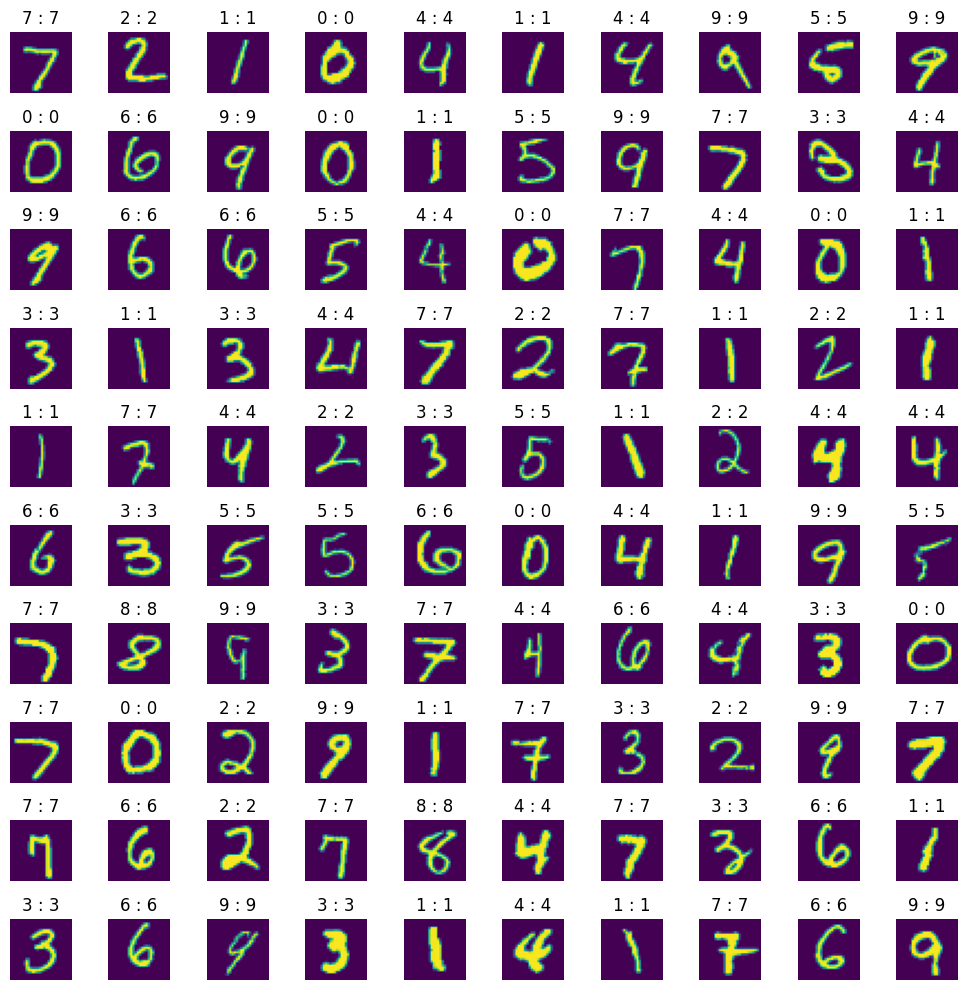

In [18]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

def one_hot(Y, classes):
    """convert an array to a one-hot matrix"""
    one_hot = np.zeros((Y.shape[0], classes))
    one_hot[np.arange(Y.shape[0]), Y] = 1
    return one_hot

if __name__ == '__main__':
    lib= np.load('../data/MNIST.npz')
    X_test_3D = lib['X_test']
    Y_test = lib['Y_test']
    X_test = X_test_3D.reshape((X_test_3D.shape[0], -1))
    Y_test_oh = one_hot(Y_test, 10)

    Y_pred_oh, accuracy, cost = evaluate(X_test, Y_test_oh, './model.ckpt')
    print("Test Accuracy:", accuracy)
    print("Test Cost:", cost)

    Y_pred = np.argmax(Y_pred_oh, axis=1)

    fig = plt.figure(figsize=(10, 10))
    for i in range(100):
        fig.add_subplot(10, 10, i + 1)
        plt.imshow(X_test_3D[i])
        plt.title(str(Y_test[i]) + ' : ' + str(Y_pred[i]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()